In [12]:
import numpy as np
from scipy import integrate
import torch

import matplotlib
import matplotlib.pyplot as plt

0.36791950647965144


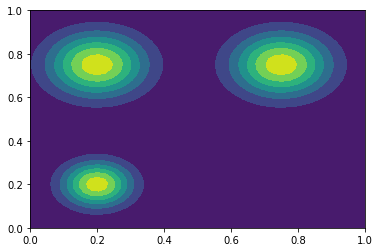

In [13]:
from probability_distribution import mu_gaussians, mu_display2D
U_shape = (1,1)
p1 = mu_gaussians([(0.2, 0.01), (0.75, 0.02), (np.array([0.2, 0.75]), 0.02)], U_shape)
print(p1(np.array([0.2,0.3])))
mu_display2D(p1, U_shape)


In [14]:
from fourier_functions import Fourier_Functions, Fourier_Functions_Visualize2D

mu = p1
K = 5
ff = Fourier_Functions(mu, U_shape, K, printProgress=True)
# for k in ff:
#     Fourier_Functions_Visualize2D(U_shape, ff[k])


Fourier Functions (mu, U_shape= (1, 1) , K= 5 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing mu fourier coefficients (mu_k)... this will take a while because integration...


In [ ]:
from mm_agent import MMAgent1
from global_comm_agent_system import GlobalCommunicationSystem
from ergodic_agents import Agent, AgentSystem
# can only really test init rn
n = len(U_shape)
all_k = list(np.ndindex(*[K]*n))
agent1 = MMAgent1(0, np.array([0.2, 0.3]), 0.2, all_k, U_shape, ff, eps=1e-5)
for k in agent1.k_bands:
    print("mu"+str(k)+": ", ff[k]["mu_k"])
print("agent1 kbands: ", agent1.k_bands)
print("agent1 ck: ", agent1.get_c_k_log())
print("agent1 ergodicity: ", agent1.get_ergodicity_log())
print("agent1 position: ", agent1.get_position_log())
agent2 = MMAgent1(1, np.array([0.6, 0.5]), 0.2, all_k, U_shape, ff, eps=1e-5)
print(agent2.get_c_k_log())
print(agent2.get_ergodicity_log())
print(agent2.get_position_log())
print("system")
system1 = AgentSystem([agent1], mu, U_shape, ff, K)
print("system k_bands: ", list(system1.all_k_bands))
print("system c_k: ", system1.get_c_k_log())
print("system ergodicity: ", system1.get_ergodicity_log())

mu(0, 0):  0.1543442209624029
mu(0, 1):  -0.08192132336295474
mu(0, 2):  0.011260548433379342
mu(1, 0):  0.042007440083285885
mu(1, 1):  0.032151150968839505
mu(1, 2):  0.013669428472842832
mu(2, 0):  0.032267693514379026
mu(2, 1):  -0.00521271716951493
mu(2, 2):  0.004674646978975583
agent1 kbands:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
agent1 ck:  [{(0, 0): array(1.), (0, 1): array(0.83125388), (0, 2): array(-0.43701602), (1, 0): array(1.14412281), (1, 1): array(0.95105652), (1, 2): array(-0.5), (2, 0): array(0.43701602), (2, 1): array(0.36327126), (2, 2): array(-0.19098301)}]
agent1 ergodicity:  [0.78382698]
agent1 position:  [[0.2 0.3]]
[{(0, 0): array(1.), (0, 1): array(8.65956056e-17), (0, 2): array(-1.41421356), (1, 0): array(-0.43701602), (1, 1): array(-3.78436673e-17), (1, 2): array(0.61803399), (2, 0): array(-1.14412281), (2, 1): array(-9.90760073e-17), (2, 2): array(1.61803399)}]
[0.73966193]
[[0.6 0.5]]
system
system k_bands:  [(0, 0), (0,

In [ ]:
t = 0
delta_t = 0.1
for i in range(1000):
    t = i * delta_t
    system1.evolve(t, delta_t)


/home/enko/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:202: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return Variable._execution_engine.run_backward(


oh no at time  45.2
oh no at time  54.1
oh no at time  59.0
oh no at time  92.9
oh no at time  93.10000000000001
oh no at time  93.30000000000001


In [ ]:
print("System vs Agent 1 c_k")
print(len(system1.c_k_log))
print(agent1.system_c_k)
print(len(agent1.c_k_log))
k = (1,2)
print([system1.c_k_log[i][k] - agent1.c_k_log[i][k] for i in range(5)])
print([system1.c_k_log[-i][k] - agent1.c_k_log[-i][k] for i in range(5)])

System vs Agent 1 c_k
1001
None
1001
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


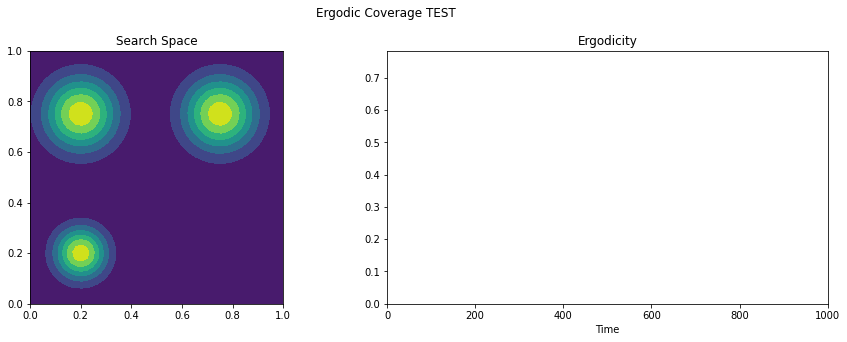

In [ ]:
system1.visualize2d(filename="test_without_c_k", additional_title="TEST", plot_c_k=False)

In [ ]:
def fourier_coefficient2distribution(ff, k_bands, c_k=None):
    def dist(x):
        res = 0
        for k in k_bands:
            if c_k is None:
                coeff_k = ff[k]['mu_k']
            else:
                coeff_k = c_k[k]
            res += coeff_k*ff[k]['f_k'](x)
        return res
    return dist

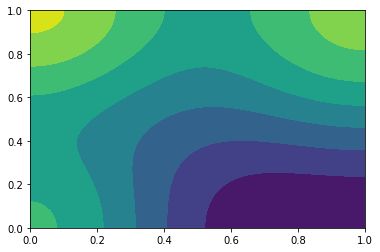

In [ ]:
recon_mu = fourier_coefficient2distribution(ff, all_k)
mu_display2D(recon_mu, U_shape)

In [ ]:
i = 0
print(agent1.x_log[i])
# K_more = 10
# ff_more = Fourier_Functions(mu, U_shape, K_more, compute_mu=False, printProgress=True)
# all_k_more = list(np.ndindex(*[K_more]*n))
# c_k = {k: ff_more[k]['f_k'](agent1.x_log[i]) for k in all_k_more}
# recon_c_k = fourier_coefficient2distribution(ff_more, all_k_more, c_k)
recon_c_k = fourier_coefficient2distribution(ff, all_k, agent1.c_k[i])
mu_display2D(recon_c_k, U_shape)

[0.2 0.3]
Fourier Functions (mu, U_shape= (1, 1) , K= 10 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing casadi fourier function (casadi_f_k)...
Aggregating all constants and functions into one dict...
Done.


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>